# Week 4 Exercise 2

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Selecting Features as Given

In [3]:
cols = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']

df = df[cols]
df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


# Finding Unique Values

In [4]:
for i in range(len(df.columns)):
    print(f"Unique values in {df.columns[i]}:\n", df[df.columns[i]].unique())

Unique values in ENGINESIZE:
 [2.  2.4 1.5 3.5 3.7 5.9 4.7 3.  4.  6.3 4.2 5.2 6.  6.8 4.4 3.6 1.4 2.5
 6.2 1.8 4.3 5.3 4.8 1.2 5.7 6.4 4.6 5.4 1.6 5.  1.  5.8 3.8 3.3 5.6 3.2
 6.5 5.5 2.1 3.4 2.7 6.6 6.7 1.3 8.4]
Unique values in CYLINDERS:
 [ 4  6 12  8 10  3  5]
Unique values in FUELCONSUMPTION_COMB:
 [ 8.5  9.6  5.9 11.1 10.6 10.  10.1 11.6  9.2  9.8 10.4 15.6 14.7 15.4
  8.8  9.3 10.2 10.9  8.3 11.2 11.3  8.4 12.5 15.7 10.5  9.1 13.2 14.6
 17.7 17.8 13.3 13.4 12.6 11.4 12.4 12.2 12.9 12.7 10.3 15.5 13.9 16.5
 14.  19.   8.7  6.7  9.9  7.9 10.7 13.8 11.  16.1 11.9 14.1 12.1 12.3
 11.5  8.2  9.5  9.  10.8 12.8 16.6 14.8 20.1 16.4 22.1 11.8 11.7 12.
  7.8  7.1  7.7 16.2 17.  15.1 15.9 20.9 21.5 22.6 18.  18.8 25.7 18.2
 18.9 25.8 14.3  8.  16.8 16.9 13.  17.3  7.5  6.9 18.4  8.1 14.4 13.1
  8.6  7.3  7.2  6.8  6.  21.9 17.2 22.5 23.  21.2 18.3 23.9  9.4 16.
 21.6 16.7 17.5 19.7 14.9 20.  19.9  7.6  6.6  7.   8.9  5.5  4.8  6.3
  6.2 14.5 15.  18.1 13.7 13.5 15.8  9.7 17.4 21.4 20.7  

# Scatter Plotting Engine Size and CO2 Emission

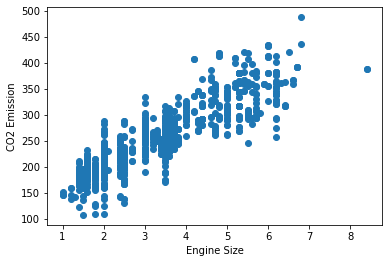

In [5]:
plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'])
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')
plt.show()

# Using Polynomial Regression for Different Degrees

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# List containing degrees
degrees     = [3, 4, 5]
mse_errors  = []
mae_errors  = []
r2_scores   = []

# Calculating and storing all the scores
for i in degrees:
    X = df.copy()
    y = X.pop('CO2EMISSIONS')
    X.head()
    X = np.array(X)
    y = np.array(y)

    # Polynomial Features
    poly = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

    # Linear Regression
    poly_reg = LinearRegression()
    poly_reg.fit(X_train, y_train)
    y_pred = poly_reg.predict(X_test)

    # root mean squared error
    poly_reg_r2 = r2_score(y_test, y_pred)
    print(f"R2 score for {i} degree is ", poly_reg_r2)
    r2_scores.append(poly_reg_r2)

    # mean squared error
    poly_reg_mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error for {i} degree is ", poly_reg_mse)
    mse_errors.append(poly_reg_mse)

    # mean absolute error
    poly_reg_mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error for {i} degree is ", poly_reg_mae)
    mae_errors.append(poly_reg_mae)
    print("\n")

R2 score for 3 degree is  0.9322474349854045
Mean Squared Error for 3 degree is  273.2797687958474
Mean Absolute Error for 3 degree is  10.230711579366215


R2 score for 4 degree is  0.9407945298015606
Mean Squared Error for 4 degree is  238.80508736154076
Mean Absolute Error for 4 degree is  8.250441311658195


R2 score for 5 degree is  0.9424416921692133
Mean Squared Error for 5 degree is  232.16126286715658
Mean Absolute Error for 5 degree is  8.236270743227555




# Conclusion

### According to Errors above
* Model with Degree 5 has highest r2 score
* Model with Degree 5 has least mean squred error
* Model with Degree 5 has least mean absolute error

#### **Model with degree 5 is the best according to above findings**